In [14]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Carregamento de base de dados
Dataset baixado manualmente do https://www.fundsexplorer.com.br/ranking#upTo--default-fiis-table e carregado no Kaggle

In [15]:
fiis_class = pd.read_excel('/kaggle/input/fiis-statusinvest/fiis-fundsexplorer (cpia manual).xlsx', header=2)
print(fiis_class.shape)
fiis_class.head()

(382, 27)


,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,PATRIMÔNIO LÍQUIDO,VPA,P/VPA,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,VACÂNCIA FÍSICA,VACÂNCIA FINANCEIRA,QUANT. ATIVOS
0,AAZQ11,INDEFINIDO,9.71,936498.48,1.01,0.10,0.0103,0.0383,0.0826,0.0826,...,2.306468e+08,9.60,1.01,0.0146,0.0000,0.0000,0.0000,NaN,NaN,0.0
1,ABCP11,SHOPPINGS,71.56,68107.52,0.78,0.50,0.0069,0.0214,0.0443,0.0895,...,4.324439e+08,91.82,0.78,0.0065,-0.0018,0.0047,0.0712,NaN,NaN,1.0
2,AFHI11,PAPÉIS,97.00,732967.67,1.01,1.10,0.0112,0.0345,0.0672,0.1360,...,2.887745e+08,94.82,1.02,0.0101,-0.0094,0.0006,0.0500,NaN,NaN,0.0
3,AGRX11,OUTROS,11.15,227136.05,NaN,0.18,0.0162,0.0474,0.0896,0.1321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,AIEC11,LAJES CORPORATIVAS,70.85,493632.19,0.75,0.78,0.0110,0.0359,0.0631,0.1304,...,4.561686e+08,102.56,0.69,0.0073,0.0024,0.0098,0.0940,NaN,NaN,2.0


# Tratamento das colunas

Pirmeiramente, avaliaremos as colunas do dataset e renomearemos para melhorar.

As colunas com nomes originais são:

In [16]:
fiis_class.columns

Index(['FUNDOS', 'SETOR', 'PREÇO ATUAL (R$)', 'LIQUIDEZ DIÁRIA (R$)', 'P/VP',
       'ÚLTIMO DIVIDENDO', 'DIVIDEND YIELD', 'DY (3M) ACUMULADO',
       'DY (6M) ACUMULADO', 'DY (12M) ACUMULADO', 'DY (3M) MÉDIA',
       'DY (6M) MÉDIA', 'DY (12M) MÉDIA', 'DY ANO', 'VARIAÇÃO PREÇO',
       'RENTAB. PERÍODO', 'RENTAB. ACUMULADA', 'PATRIMÔNIO LÍQUIDO', 'VPA',
       'P/VPA', 'DY PATRIMONIAL', 'VARIAÇÃO PATRIMONIAL',
       'RENTAB. PATR. PERÍODO', 'RENTAB. PATR. ACUMULADA', 'VACÂNCIA FÍSICA',
       'VACÂNCIA FINANCEIRA', 'QUANT. ATIVOS'],
      dtype='object')

Agora renomearei as colunas com um nome mais amigável para o código:

In [17]:
colunas = {"FUNDOS": "ticker",
          'SETOR': 'subsetor',
          'PREÇO ATUAL (R$)': 'preco', 
          'LIQUIDEZ DIÁRIA (R$)': 'liq_diaria', 
          'P/VP': 'pvp',
          'ÚLTIMO DIVIDENDO': 'ult_dividendo', 
          'DIVIDEND YIELD': 'dy', 
          'DY (3M) ACUMULADO': 'dy_3m_acum',
          'DY (6M) ACUMULADO': 'dy_6m_acum', 
          'DY (12M) ACUMULADO': 'dy_12m_acum', 
          'DY (3M) MÉDIA': 'dy_3m_media',
          'DY (6M) MÉDIA': 'dy_6m_media', 
          'DY (12M) MÉDIA': 'dy_12m_media', 
          'DY ANO':'dy_ano', 
          'VARIAÇÃO PREÇO': 'var_preco',
          'RENTAB. PERÍODO': 'rentabilidade', 
          'RENTAB. ACUMULADA': 'rentabilidade_acum', 
          'PATRIMÔNIO LÍQUIDO': 'pl', 
          'VPA': 'vpa',
          'P/VPA': 'pvpa', 
          'DY PATRIMONIAL': 'dy_patr', 
          'VARIAÇÃO PATRIMONIAL': 'var_patr',
          'RENTAB. PATR. PERÍODO': 'rentab_patr', 
          'RENTAB. PATR. ACUMULADA': 'rentab_patr_acum', 
          'VACÂNCIA FÍSICA': 'vac_fisica',
          'VACÂNCIA FINANCEIRA': 'vac_fincanceira', 
          'QUANT. ATIVOS': 'quant_ativos'}

In [18]:
fiis_class.rename(columns=colunas,inplace=True)
fiis_class.head()

,ticker,subsetor,preco,liq_diaria,pvp,ult_dividendo,dy,dy_3m_acum,dy_6m_acum,dy_12m_acum,...,pl,vpa,pvpa,dy_patr,var_patr,rentab_patr,rentab_patr_acum,vac_fisica,vac_fincanceira,quant_ativos
0,AAZQ11,INDEFINIDO,9.71,936498.48,1.01,0.10,0.0103,0.0383,0.0826,0.0826,...,2.306468e+08,9.60,1.01,0.0146,0.0000,0.0000,0.0000,NaN,NaN,0.0
1,ABCP11,SHOPPINGS,71.56,68107.52,0.78,0.50,0.0069,0.0214,0.0443,0.0895,...,4.324439e+08,91.82,0.78,0.0065,-0.0018,0.0047,0.0712,NaN,NaN,1.0
2,AFHI11,PAPÉIS,97.00,732967.67,1.01,1.10,0.0112,0.0345,0.0672,0.1360,...,2.887745e+08,94.82,1.02,0.0101,-0.0094,0.0006,0.0500,NaN,NaN,0.0
3,AGRX11,OUTROS,11.15,227136.05,NaN,0.18,0.0162,0.0474,0.0896,0.1321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,AIEC11,LAJES CORPORATIVAS,70.85,493632.19,0.75,0.78,0.0110,0.0359,0.0631,0.1304,...,4.561686e+08,102.56,0.69,0.0073,0.0024,0.0098,0.0940,NaN,NaN,2.0


## Colunas 'subsetor' e 'setor'

Outra observação importante é criar uma coluna de 'setor'. Se você observou, anteriormente eu substituí setor por subsetor.

Conforme o artigo da Infomoney [Fundos Imobiliários de Tijolo, papel e híbridos](https://www.infomoney.com.br/guias/fundos-imobiliarios-tijolo-papel-hibrido/), "cada um desses três tipos de FIIs têm suas peculiaridades em relação à gestão e aos tipos de ativos nos quais investem".

Na sequência, o artigo continua sobre os **Títulos de Tijolo**: 

> O fundo imobiliário de “tijolo” é o tipo de FII que investe o seu patrimônio diretamente em imóveis. Esses espaços podem estar em zonas urbanas ou rurais, e podem ter destinação comercial ou residencial – os últimos ainda não são tão comuns.
> Basicamente, o objetivo de um fundo de “tijolo” é obter retorno com a locação dos ativos imobiliários. Ou seja, a receita com aluguel dos imóveis vai para o patrimônio do fundo, e é distribuída aos investidores sob a forma de dividendos, de acordo com a quantidade de cotas que cada um possui.

São subdivididos por:

* Lajes corporativas
* Shoppings
* Galpões logísticos
* Hospitais
* Hotelaria
* Residenciais
* Agências bancárias e educação

Cada um deles é detalhado no artigo, e sugiro fortemente de ler o artigo completo.

Na sequência o artigo explica os **Fundos de Papel**:

> Também chamados de fundos de recebíveis, esses fundos são compostos por títulos relacionados ao setor imobiliário. Diferentemente dos fundos de “tijolo”, esses FIIs não possuem imóveis em seu patrimônio. Em vez disso, o gestor do fundo investe em papéis que representam direitos de créditos imobiliários, conforme veremos a seguir.
> Basicamente, os FIIs de”papel” são compostos por títulos de renda fixa como Letras de Crédito Imobiliário (LCIs), Certificados de Recebíveis Imobiliários (CRIs) e Letras Hipotecárias (LHs).

**Fundos híbridos** basicamente são compostos por ativos de papel e de tijolo.

Portanto, nos momentos seguintes vou agrupar esses numa nova coluna de Setor.

Avaliando os dados únicos de subsetor, temos (eliminando os dados vazios):

In [21]:
fiis_class = fiis_class.dropna(subset='subsetor')
fiis_class.subsetor.unique()

array(['INDEFINIDO', 'SHOPPINGS', 'PAPÉIS', 'OUTROS',
       'LAJES CORPORATIVAS', 'FUNDO DE FUNDOS', 'MISTO',
       'IMÓVEIS RESIDENCIAIS', 'IMÓVEIS INDUSTRIAIS E LOGÍSTICOS',
       'IMÓVEIS COMERCIAIS - OUTROS', 'AGÊNCIAS DE BANCOS',
       'FUNDO DE DESENVOLVIMENTO', 'VAREJO', 'FIAGRO', 'EDUCACIONAL',
       'HOSPITALAR', 'HOTÉIS'], dtype=object)

In [ ]:
setor = {'INDEFINIDO': 'indefinido', 
         'SHOPPINGS': 'tijolo', 
         'PAPÉIS', 
         'OUTROS',
         'LAJES CORPORATIVAS', 
         'FUNDO DE FUNDOS', 'MISTO',
       'IMÓVEIS RESIDENCIAIS', 'IMÓVEIS INDUSTRIAIS E LOGÍSTICOS',
       'IMÓVEIS COMERCIAIS - OUTROS', 'AGÊNCIAS DE BANCOS',
       'FUNDO DE DESENVOLVIMENTO', 'VAREJO', 'FIAGRO', 'EDUCACIONAL',
       'HOSPITALAR', 'HOTÉIS'

fiis_class['setor'] = fiis_class.apply(lambda x: x.subsetor.replace()
                                       

In [1]:
fiis_class.info()

NameError: name 'fiis_class' is not defined

## Análise de fundos imobiliários por subsetor

<Axes: xlabel='count', ylabel='subsetor'>

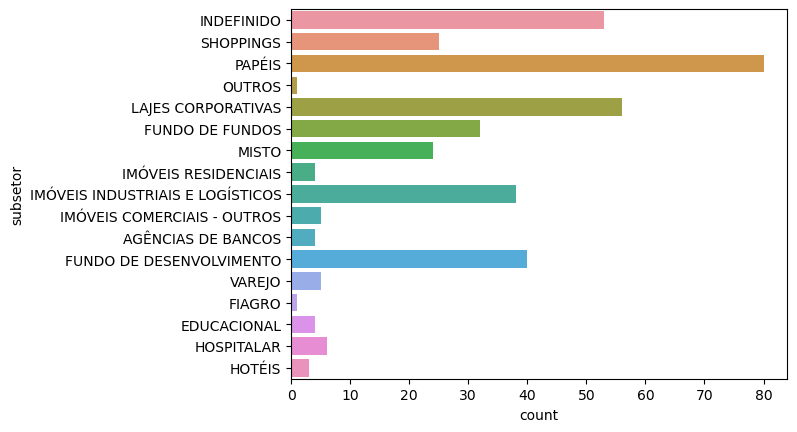

In [20]:
sns.countplot(data = fiis_class,
               y = 'subsetor')

False

In [71]:
fiis_class[['FUNDOS','SETOR','P/VP']].sort_values(by='P/VP', 
                                                  ascending=False)

KeyError: "None of [Index(['FUNDOS', 'SETOR', 'P/VP'], dtype='object')] are in the [columns]"

In [ ]:
fiis_class = fiis_class[fiis_class['P/VP']<50]

In [ ]:
sns.boxplot(x = fiis_class['P/VP'],
           y = fiis_class['SETOR'])
sns.boxplot(x = 1)

In [ ]:
fiis_class['PATRIMÔNIO LÍQUIDO'].describe().T

In [ ]:
soup=BeautifulSoup(html,'html.parser')
soup


In [ ]:
texto = soup.find_all("td")
soup.get_text('li')

In [ ]:
soup.find('tbody').find_all('tr')

In [ ]:
page.href

In [ ]:
fiis = page.get_text('a').split('\n')[246:]
fiis.find

In [ ]:
tabela.text